In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [15]:
pairing = {
    0: "Na_Na",
    1: "Na_Cl",
    2: "Cl_Cl"
        }

coldic = {
    0: "red",
    1: "green",
    2: "blue",
}        

skip_r = {
    0: 19,
    1: 629,
    2: 1239,
}

max_r = 600

iters = {
    0 : "01", 
    1 : "05",
    2 : "10",
    }

In [16]:
data1 = np.loadtxt("NaCl.01.i001.pot", skiprows=629, max_rows= 600, unpack=True)

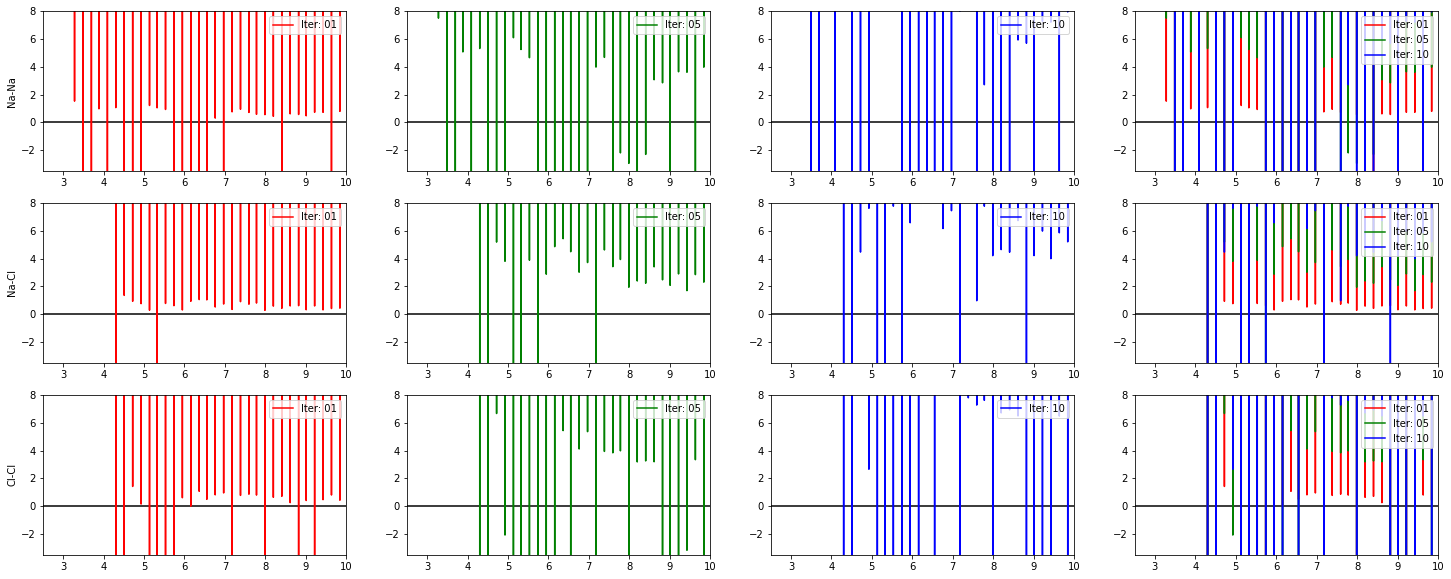

In [17]:
fig, ax = plt.subplots(3, 4, figsize=(25, 10))

for j in range(0, 3):
    for i in range(0, 3):
        x, y = np.loadtxt("NaCl.01.i0"+str(iters[i])+".pot", skiprows=skip_r[j], max_rows= 600, unpack=True)

        #smoothing actually makes it kinda worse
        if False:
            filt = (np.where(y > 4.5)[0])[-1]
            x = x[filt:]
            y = y[filt:]
            y = savgol_filter(y, 11, 3)

        ax[j, i].plot(x, y , c=coldic[i], label="Iter: " + iters[i] )
        
        ax[j, i].legend(loc="upper right")
        ax[j, i].set_ylim(-3.5, 8)
        ax[j, i].set_xlim(2.5, 10)
        
        ax[j, i].axhline(0, 0, 20, c="black", zorder=-1) #colors="red"

        ax[j, 3].plot(x, y , c=coldic[i], label="Iter: " + iters[i])

    ax[j, 3].set_ylim(-3.5, 8)
    ax[j, 3].set_xlim(2.5, 10)
    ax[j, 3].legend(loc="upper right")
    ax[j, 3].axhline(0, 0, 20, c="black", zorder=-1) #colors="red"

ax[0, 0].set_ylabel("Na-Na")
ax[1, 0].set_ylabel("Na-Cl")
ax[2, 0].set_ylabel("Cl-Cl")
plt.savefig("all_int_3_iter.pdf")

ValueError: If mode is 'interp', window_length must be less than or equal to the size of x.

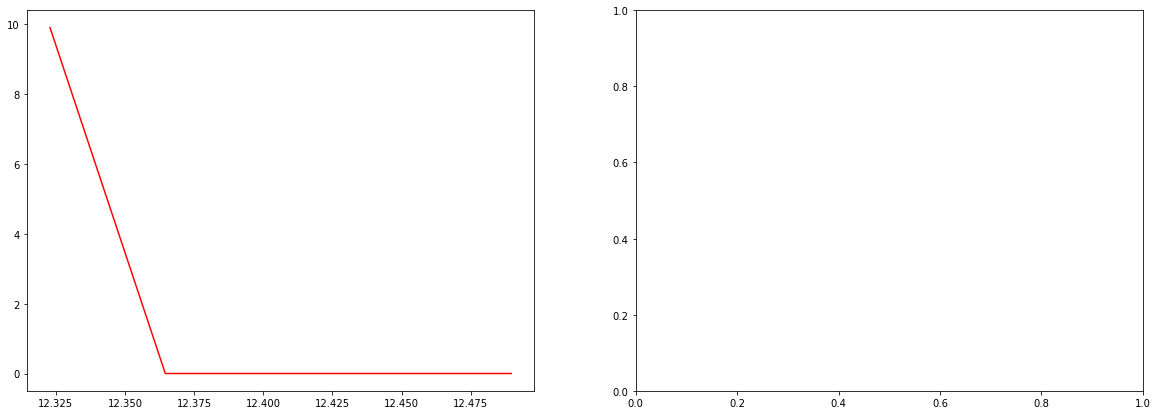

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

for i in range(0, 3):
    x, y = np.loadtxt("NaCl.01.i008.pot", skiprows=skip_r[i], max_rows= 600, unpack=True)

    filt = (np.where(y > 8)[0])[-1]

    x = x[filt:]
    y = y[filt:]

    ax[0].plot(x, y, c=coldic[i], label=pairing[i])
    

    d_S = savgol_filter(y, 11, 3)
    ax[1].plot(x, d_S, c=coldic[i], label=pairing[i])
    
for j in range(0, 2):    
    ax[j].legend(loc="upper right")
    ax[j].set_xlim(2.5, 10) 
    ax[j].set_ylim(-3.5, 8)
